In [30]:
import matplotlib.pyplot as plt
import seaborn as sns, pandas as pd, numpy as np, random

random.seed(1000)
plt.rcParams['figure.figsize'] = (5,3)

# 1. What is clustering?
- Process of grouping items with similar characteristics
- Items in groups similar to each other than in other groups
- Example: Distance between points on a 2D plane

### 1.1 Basics of cluster analysis
- A group of items with similar characteristics
- Customer Segments
- Clustering algorithms: Hierarchical clustering, K-Means, DBSCAN, Gaussian Methods

#### Hierarchical clustering in SciPy

In [23]:
from scipy.cluster.hierarchy import linkage, fcluster
# Create the dataframe
x_coordinates = [80.1, 93.1,86.6,98.5,86.4,9.5,15.2,3.4,
                 10.4,20.3,44.2,56.8,49.2,44.0]
y_coordniates = [87.2,96.1,95.6,92.4,92.4,57.7,49.4,
                 47.3,59.1,55.5,2.1,10.9,24.1,10.3]
df = pd.DataFrame({'x_coordinate':x_coordinates,
                   'y_coordinate':y_coordniates})

'linkage()' builds hierarchical tree using Ward's minimum-variance clustering:
- Starts by treating each point as its own cluster
- Then it iteratively merges the two most similar clusters
- Continuous until everything is merged into one big cluster
- 'ward' is how the similarity is measured: Merges clusters such that, at each step, the increase in total _within-cluster_ variance is minimized.

In [24]:
Z = linkage(df, 'ward')
Z[:5]

array([[ 5.        ,  8.        ,  1.6643317 ,  2.        ],
       [ 2.        ,  4.        ,  3.20624391,  2.        ],
       [ 1.        ,  3.        ,  6.54599114,  2.        ],
       [ 6.        ,  9.        ,  7.95110055,  2.        ],
       [10.        , 13.        ,  8.20243866,  2.        ]])

'fcluster' cuts the hierarchical tree into final cluster assignments, parameter:
- Z: Uses the previously computed linkage tree
- 3: Desired number of clusters
- criterion='maxclust': From exactly 3 clusters

In [25]:
# Cut the tree to produce 3 clusters
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

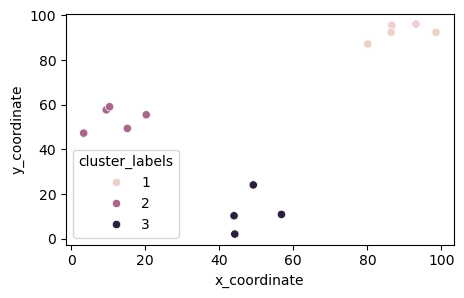

In [ ]:
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue = 'cluster_labels',data=df)
plt.show()

#### K-Means clustering in SciPy
1. You choose k - the number of clusters upfront
2. The algorithm randomly selects k initial centroids
3. Each data point is assigned to the nearest centroid
4. For each cluster, a new centroid is computed
5. Reassign points to the new centroids
6. Algorithm stops when centorids no longer move significantly

In [31]:
from scipy.cluster.vq import kmeans, vq
# Use the same dataset
x_coordinates = [80.1, 93.1,86.6,98.5,86.4,9.5,15.2,3.4,
                 10.4,20.3,44.2,56.8,49.2,44.0]
y_coordniates = [87.2,96.1,95.6,92.4,92.4,57.7,49.4,
                 47.3,59.1,55.5,2.1,10.9,24.1,10.3]
df = pd.DataFrame({'x_coordinate':x_coordinates,
                   'y_coordinate':y_coordniates})

'vq()' compares each observation to each centroid, assigns the point to the closest centroid.

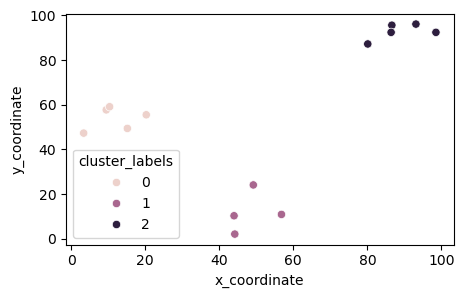

In [34]:
# Use KMeans
centroids,_ = kmeans(df,3)
df['cluster_labels'], _ = vq(df, centroids)
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data=df)
plt.show()

### 1.2 Data preparation for cluster analysis
- Data in raw form may lead to bias in clustering
- Clusters may be heavily dependent on one variable
- Solution: Normalization of individual variables

#### Normalization of data
Process of rescaling data to a standard deviation of 1:

x_new = x / std_dev(x)

In [41]:
from scipy.cluster.vq import whiten
data = [5,1,3,3,2,3,3,8,1,2,2,3,5]
scaled_data = whiten(data)
scaled_data[:5]

array([2.72733941, 0.54546788, 1.63640365, 1.63640365, 1.09093577])

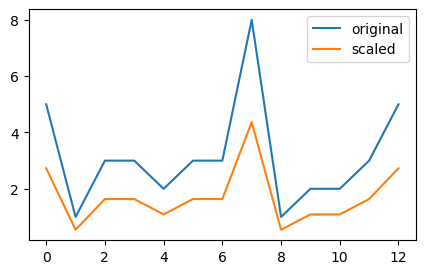

In [42]:
# Illustration: Normalization of data
plt.plot(data, label = 'original')
plt.plot(scaled_data, label = 'scaled')
plt.legend()
plt.show()